<h1>Introduction</h1>

In [1]:
import sqlite3
import pandas as pd

In [14]:
# create a connection instance
conn = sqlite3.connect('factbook.db')

In [15]:
# read the query using Pandas
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [16]:
# read the first five rows
q2 = 'select * from facts limit 5;'
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


<h1>Summary Statistics</h1>

In [19]:
# write a single query that return minimum population,maximum poplulation,minimum popuation growth,maximum population growth
q3="select MIN(population),MAX(population),MIN(population_growth),MAX(population_growth) from facts;"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


<h1>Outliers</h1>

In [21]:
# exploring outlier
# Write a query that returns the countrie(s) with a population of 0.

q4 = '''
SELECT name , population FROM FACTS
WHERE population = 0;
'''

pd.read_sql_query(q4, conn)

,name,population
0,Antarctica,0


In [23]:
#Write a query that returns the countrie(s) with a population of 7256490011.

q5 = '''
SELECT name,population FROM FACTS
WHERE population = (SELECT MAX(population) FROM facts);
'''

pd.read_sql_query(q5, conn)

,name,population
0,World,7256490011


In [24]:
# query the data to exclude the outliers

q6='''
SELECT population,population_growth,birth_rate,death_rate FROM facts
WHERE population !=(SELECT MIN(population) FROM facts) AND population != (SELECT mAX(population) FROM facts);
'''

df = pd.read_sql_query(q6,conn)

In [25]:
df

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


<h1>Histograms</h1>

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
type(list(df.columns))

list

In [37]:
column[1]

'population_growth'

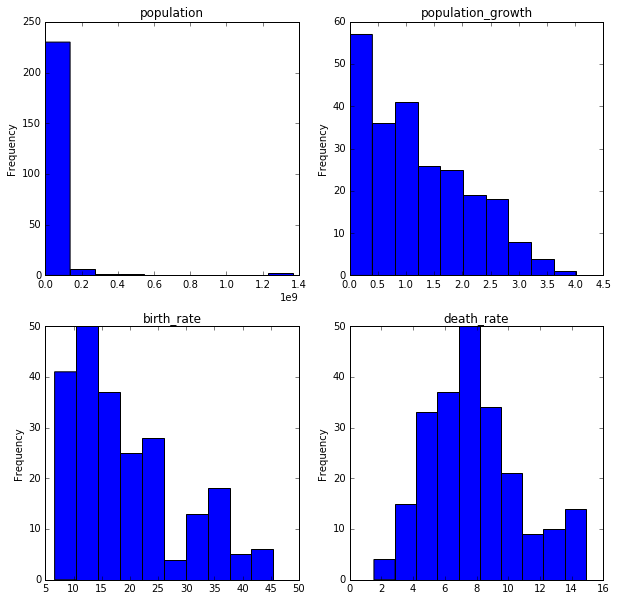

In [51]:
fig = plt.figure(figsize = (10,10))
column = list(df.columns)
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    ax = df.loc[:,column[i]].plot(kind='hist')
    ax.set_title(column[i])
    
plt.show()
    
    
    
    
